# Tutorial 9: Global model

Working with panel data (multiple time series). NeuralProphet allows to model local and global components.

We are using the ERCOT dataset which contains data for multiple regions. NeuralProphet requires the data to be in a single column with an additional ID column to identify the region.

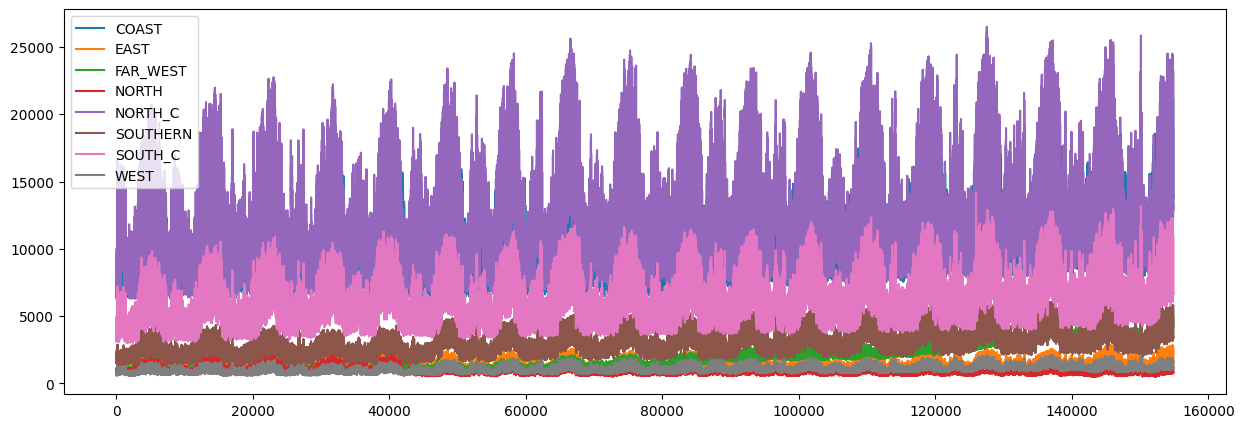

In [1]:
import pandas as pd

df = pd.read_csv(
    "https://github.com/ourownstory/neuralprophet-data/raw/main/datasets/multivariate/load_ercot_regions.csv"
)
fig = df.plot(figsize=(15, 5))

First we define a base model which uses global modelling. This means all regions are modelled together.

In [2]:
from neuralprophet import NeuralProphet, set_log_level

# Here we use the same dataset only preprocessed to match NeuralProphet's input format
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/datasets/multivariate/ercot-panel.csv")
df.head()

# Disable log messages below error
set_log_level("ERROR")

# Base model
m = NeuralProphet()
m.set_plotting_backend("plotly-static")
metrics = m.fit(df, freq="H")
forecast = m.predict(df)
m.plot(forecast, df_name="NORTH_C")

Finding best initial lr:   0%|          | 0/283 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

We then define a second model which uses local modelling. This means each region is modelled separately for trend and seasonality.

Finding best initial lr:   0%|          | 0/283 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

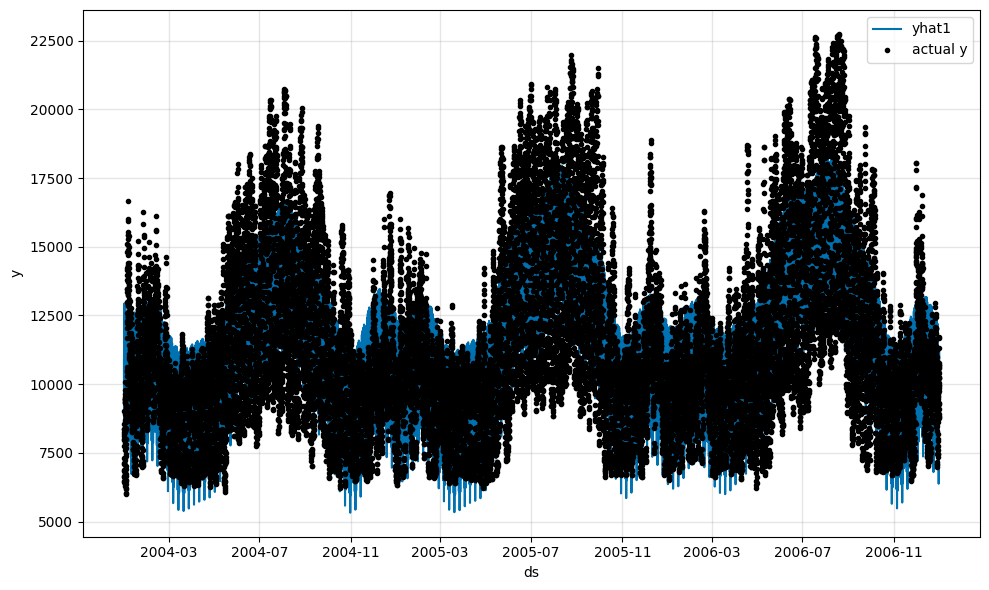

In [ ]:
m = NeuralProphet(
    trend_global_local="local",
    season_global_local="local",
)
m.set_plotting_backend("plotly-static")
metrics = m.fit(df, freq="H")
forecast = m.predict(df)
m.plot(forecast, df_name="NORTH_C")